In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
X = [ [180, 15,0],
[177, 42,0],
[136, 35,1],[174, 65,0],
[141, 28,1]]
Y = ['man', 'woman', 'woman', 'man', 'woman']
data_feature_names = [ 'height', 'hair length', 'voice pitch' ]
# Training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
# Visualize data
dot_data = tree.export_graphviz(clf,feature_names=data_feature_names,out_file=None,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [3]:
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

In [8]:
from IPython.display import Image

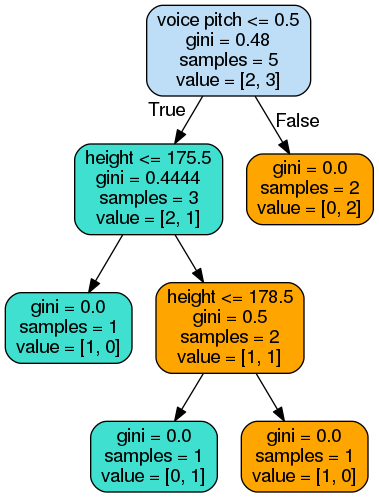

In [9]:
Image(graph.create_png())

In [95]:
import pandas as pd
from pandas import Series, DataFrame
data = pd.read_csv("~/merged.csv")
data.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,2,3,4,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
0,BitTorrent,391223,4114484,7322,5650,L2R,"F,P,A","F,P,A",192.168.2.107,tcp_ip,1989,80.246.149.72,6880,2010-06-14T21:54:57,2010-06-15T01:43:38,Normal
1,Unknown_UDP,236345,5324121,4282,3378,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,96.238.239.35,24457,2010-06-14T21:54:58,2010-06-15T00:52:01,Normal
2,Unknown_UDP,410420,11797592,9416,5791,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,220.126.251.32,27295,2010-06-14T21:55:15,2010-06-15T01:54:44,Normal
3,BitTorrent,127588,2949293,2249,1853,L2R,"P,A","F,R,P,A",192.168.2.107,tcp_ip,2048,92.126.24.44,44817,2010-06-14T21:56:24,2010-06-15T00:53:07,Normal
4,Unknown_UDP,389781,11382564,8837,5531,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,67.173.154.16,53341,2010-06-14T21:57:08,2010-06-15T01:54:44,Normal


In [96]:
data.describe()

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
count,571700,571700,571700,571700,571700,571700,440933,422484,571700,571700,571700,571700,571700,571700,571700,571700
unique,74,19816,70356,2519,1978,5,20,26,2134,6,71417,23917,15860,72799,77179,3
top,HTTPWeb,477,0,6,6,L2R,"F,S,P,A","F,S,P,A",192.168.2.107,tcp_ip,58040,203.73.24.75,80,2010-06-15T09:11:31,2010-06-15T14:45:15,Normal
freq,204133,28868,68834,74539,88839,490406,341425,313266,82964,441563,53307,80664,350057,86,69,534238


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571700 entries, 0 to 571699
Data columns (total 16 columns):
appName                           571700 non-null object
totalSourceBytes                  571700 non-null object
totalDestinationBytes             571700 non-null object
totalDestinationPackets           571700 non-null object
totalSourcePackets                571700 non-null object
direction                         571700 non-null object
sourceTCPFlagsDescription         440933 non-null object
destinationTCPFlagsDescription    422484 non-null object
source                            571700 non-null object
protocolName                      571700 non-null object
sourcePort                        571700 non-null object
destination                       571700 non-null object
destinationPort                   571700 non-null object
startDateTime                     571700 non-null object
stopDateTime                      571700 non-null object
Tag                               

In [98]:
data.protocolName.value_counts()

tcp_ip          441563
udp_ip          124023
icmp_ip           6073
igmp                20
ip                  19
protocolName         2
Name: protocolName, dtype: int64

In [99]:
data[pd.isnull(data.sourceTCPFlagsDescription)][data.protocolName=='tcp_ip']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
1958,HTTPWeb,0,64,1,0,L2R,NaN,"R,A",192.168.3.114,tcp_ip,2127,63.146.109.204,80,2010-06-15T00:10:51,2010-06-15T00:10:51,Normal
2386,HTTPWeb,0,64,1,0,L2R,NaN,"R,A",192.168.4.118,tcp_ip,2632,75.126.11.131,80,2010-06-15T00:13:05,2010-06-15T00:13:05,Normal
2394,SecureWeb,0,64,1,0,L2R,NaN,"R,A",192.168.2.111,tcp_ip,4220,97.74.104.201,443,2010-06-15T00:13:07,2010-06-15T00:13:07,Normal
2939,HTTPImageTransfer,0,64,1,0,L2R,NaN,A,192.168.2.106,tcp_ip,3257,203.73.24.75,80,2010-06-15T00:16:59,2010-06-15T00:17:00,Normal
3903,HTTPImageTransfer,0,64,1,0,L2R,NaN,A,192.168.1.101,tcp_ip,1485,150.101.26.114,80,2010-06-15T00:21:59,2010-06-15T00:22:00,Normal
4808,HTTPWeb,0,64,1,0,L2R,NaN,"R,A",192.168.1.101,tcp_ip,1398,125.7.104.49,80,2010-06-15T00:23:55,2010-06-15T00:24:58,Normal
4817,HTTPWeb,0,64,1,0,L2R,NaN,"R,A",192.168.1.101,tcp_ip,1386,202.139.94.37,80,2010-06-15T00:24:00,2010-06-15T00:24:00,Normal
4818,HTTPWeb,0,64,1,0,L2R,NaN,"R,A",192.168.4.118,tcp_ip,2768,75.126.11.131,80,2010-06-15T00:24:01,2010-06-15T00:24:01,Normal
7183,giop-ssl,0,198,3,0,R2L,NaN,S,115.184.197.205,tcp_ip,51206,192.168.2.107,2482,2010-06-15T00:43:49,2010-06-15T00:43:58,Normal
12047,HTTPImageTransfer,0,64,1,0,L2R,NaN,A,192.168.1.101,tcp_ip,1999,74.54.152.11,80,2010-06-15T01:21:55,2010-06-15T01:22:00,Normal


In [100]:
data.sourceTCPFlagsDescription.value_counts()

F,S,P,A                      341425
S,P,A                         40747
F,A                           26945
S                             14889
F,P,A                          6125
S,R,P,A                        2963
F,S,R,P,A                      1766
F,S,A                          1567
P,A                            1526
F,R,A                          1015
A                               850
S,A                             555
R,A                             207
R                               136
S,R                             103
F,R,P,A                          56
R,P,A                            40
S,R,A                            11
F,S,R,A                           5
sourceTCPFlagsDescription         2
Name: sourceTCPFlagsDescription, dtype: int64

In [101]:
data.drop(data[data.sourceTCPFlagsDescription == 'sourceTCPFlagsDescription'].index,axis=0,inplace=True)

In [102]:
data.sourceTCPFlagsDescription.value_counts()

F,S,P,A      341425
S,P,A         40747
F,A           26945
S             14889
F,P,A          6125
S,R,P,A        2963
F,S,R,P,A      1766
F,S,A          1567
P,A            1526
F,R,A          1015
A               850
S,A             555
R,A             207
R               136
S,R             103
F,R,P,A          56
R,P,A            40
S,R,A            11
F,S,R,A           5
Name: sourceTCPFlagsDescription, dtype: int64

In [103]:
data.fillna('N',inplace=True)
data.destinationTCPFlagsDescription.value_counts()

F,S,P,A                  313266
N                        149216
F,S,R,P,A                 44906
S,P,A                     20328
F,A                       14434
R,A                        6720
F,S,A                      5025
R                          4591
F,P,A                      2806
S,A                        1830
P,A                        1726
S,R,A                      1702
S,R,P,A                    1285
F,R,P,A                    1095
F,R,A                      1065
F,S,R,A                     813
A                           697
S                           139
R,P,A                        26
F,S,P,A,Illegal8              9
R,A,Illegal7,Illegal8         9
F,S,R,P,A,Illegal8            4
R,A,Illegal7                  3
F,P,A,Illegal8                1
S,P,A,Illegal8                1
R,A,Illegal8                  1
Name: destinationTCPFlagsDescription, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
clf = tree.DecisionTreeClassifier()

In [106]:
data.protocolName.value_counts()

tcp_ip     441563
udp_ip     124023
icmp_ip      6073
igmp           20
ip             19
Name: protocolName, dtype: int64

In [107]:
data['protocolName']=data['protocolName'].map({'tcp_ip':1,'udp_ip':2,'icmp_ip':3,'igmp':4,'ip':5})

In [108]:
data.head()

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
0,BitTorrent,391223,4114484,7322,5650,L2R,"F,P,A","F,P,A",192.168.2.107,1,1989,80.246.149.72,6880,2010-06-14T21:54:57,2010-06-15T01:43:38,Normal
1,Unknown_UDP,236345,5324121,4282,3378,L2R,N,N,192.168.2.107,2,58040,96.238.239.35,24457,2010-06-14T21:54:58,2010-06-15T00:52:01,Normal
2,Unknown_UDP,410420,11797592,9416,5791,L2R,N,N,192.168.2.107,2,58040,220.126.251.32,27295,2010-06-14T21:55:15,2010-06-15T01:54:44,Normal
3,BitTorrent,127588,2949293,2249,1853,L2R,"P,A","F,R,P,A",192.168.2.107,1,2048,92.126.24.44,44817,2010-06-14T21:56:24,2010-06-15T00:53:07,Normal
4,Unknown_UDP,389781,11382564,8837,5531,L2R,N,N,192.168.2.107,2,58040,67.173.154.16,53341,2010-06-14T21:57:08,2010-06-15T01:54:44,Normal


In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
le = LabelEncoder()
le.fit(data.source)
s = le.transform(data.source)

In [111]:
data.source = s

In [112]:
le = LabelEncoder()
le.fit(data.destination)
s = le.transform(data.destination)
data.destination = s

In [121]:
Y = data.Tag
X = data.drop("Tag",axis = 1)
train_x, test_x,train_y, test_y = train_test_split(X,Y,train_size=0.65)

In [122]:
data.describe()

,source,protocolName,destination
count,571698.000000,571698.000000,571698.000000
mean,551.156368,1.238421,9952.510352
std,82.015172,0.451033,5995.844378
min,0.000000,1.000000,0.000000
25%,541.000000,1.000000,5845.000000
50%,544.000000,1.000000,7122.000000
75%,553.000000,1.000000,13348.000000
max,2132.000000,5.000000,23915.000000


In [124]:
#clf.fit(train_x[['source','destination','protocolName']],Y)
#data.protocolName.describe()
train_x = train_x[['source','protocolName','destination']]
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [126]:
test_x = test_x[['source','protocolName','destination']]
pred = clf.predict(test_x)

In [128]:
Series(pred).value_counts()

Normal    185388
Attack     14707
dtype: int64

In [136]:
test_y.value_counts()

Normal    187042
Attack     13053
Name: Tag, dtype: int64

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y,pred)

0.99155401184437397

In [138]:
confusion_matrix(test_y,pred)

array([[ 13035,     18],
       [  1672, 185370]])

In [133]:
dot_data = tree.export_graphviz(clf,feature_names=train_x.columns,out_file=None,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [131]:
train_x.columns

Index(['source', 'protocolName', 'destination'], dtype='object')

In [134]:
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

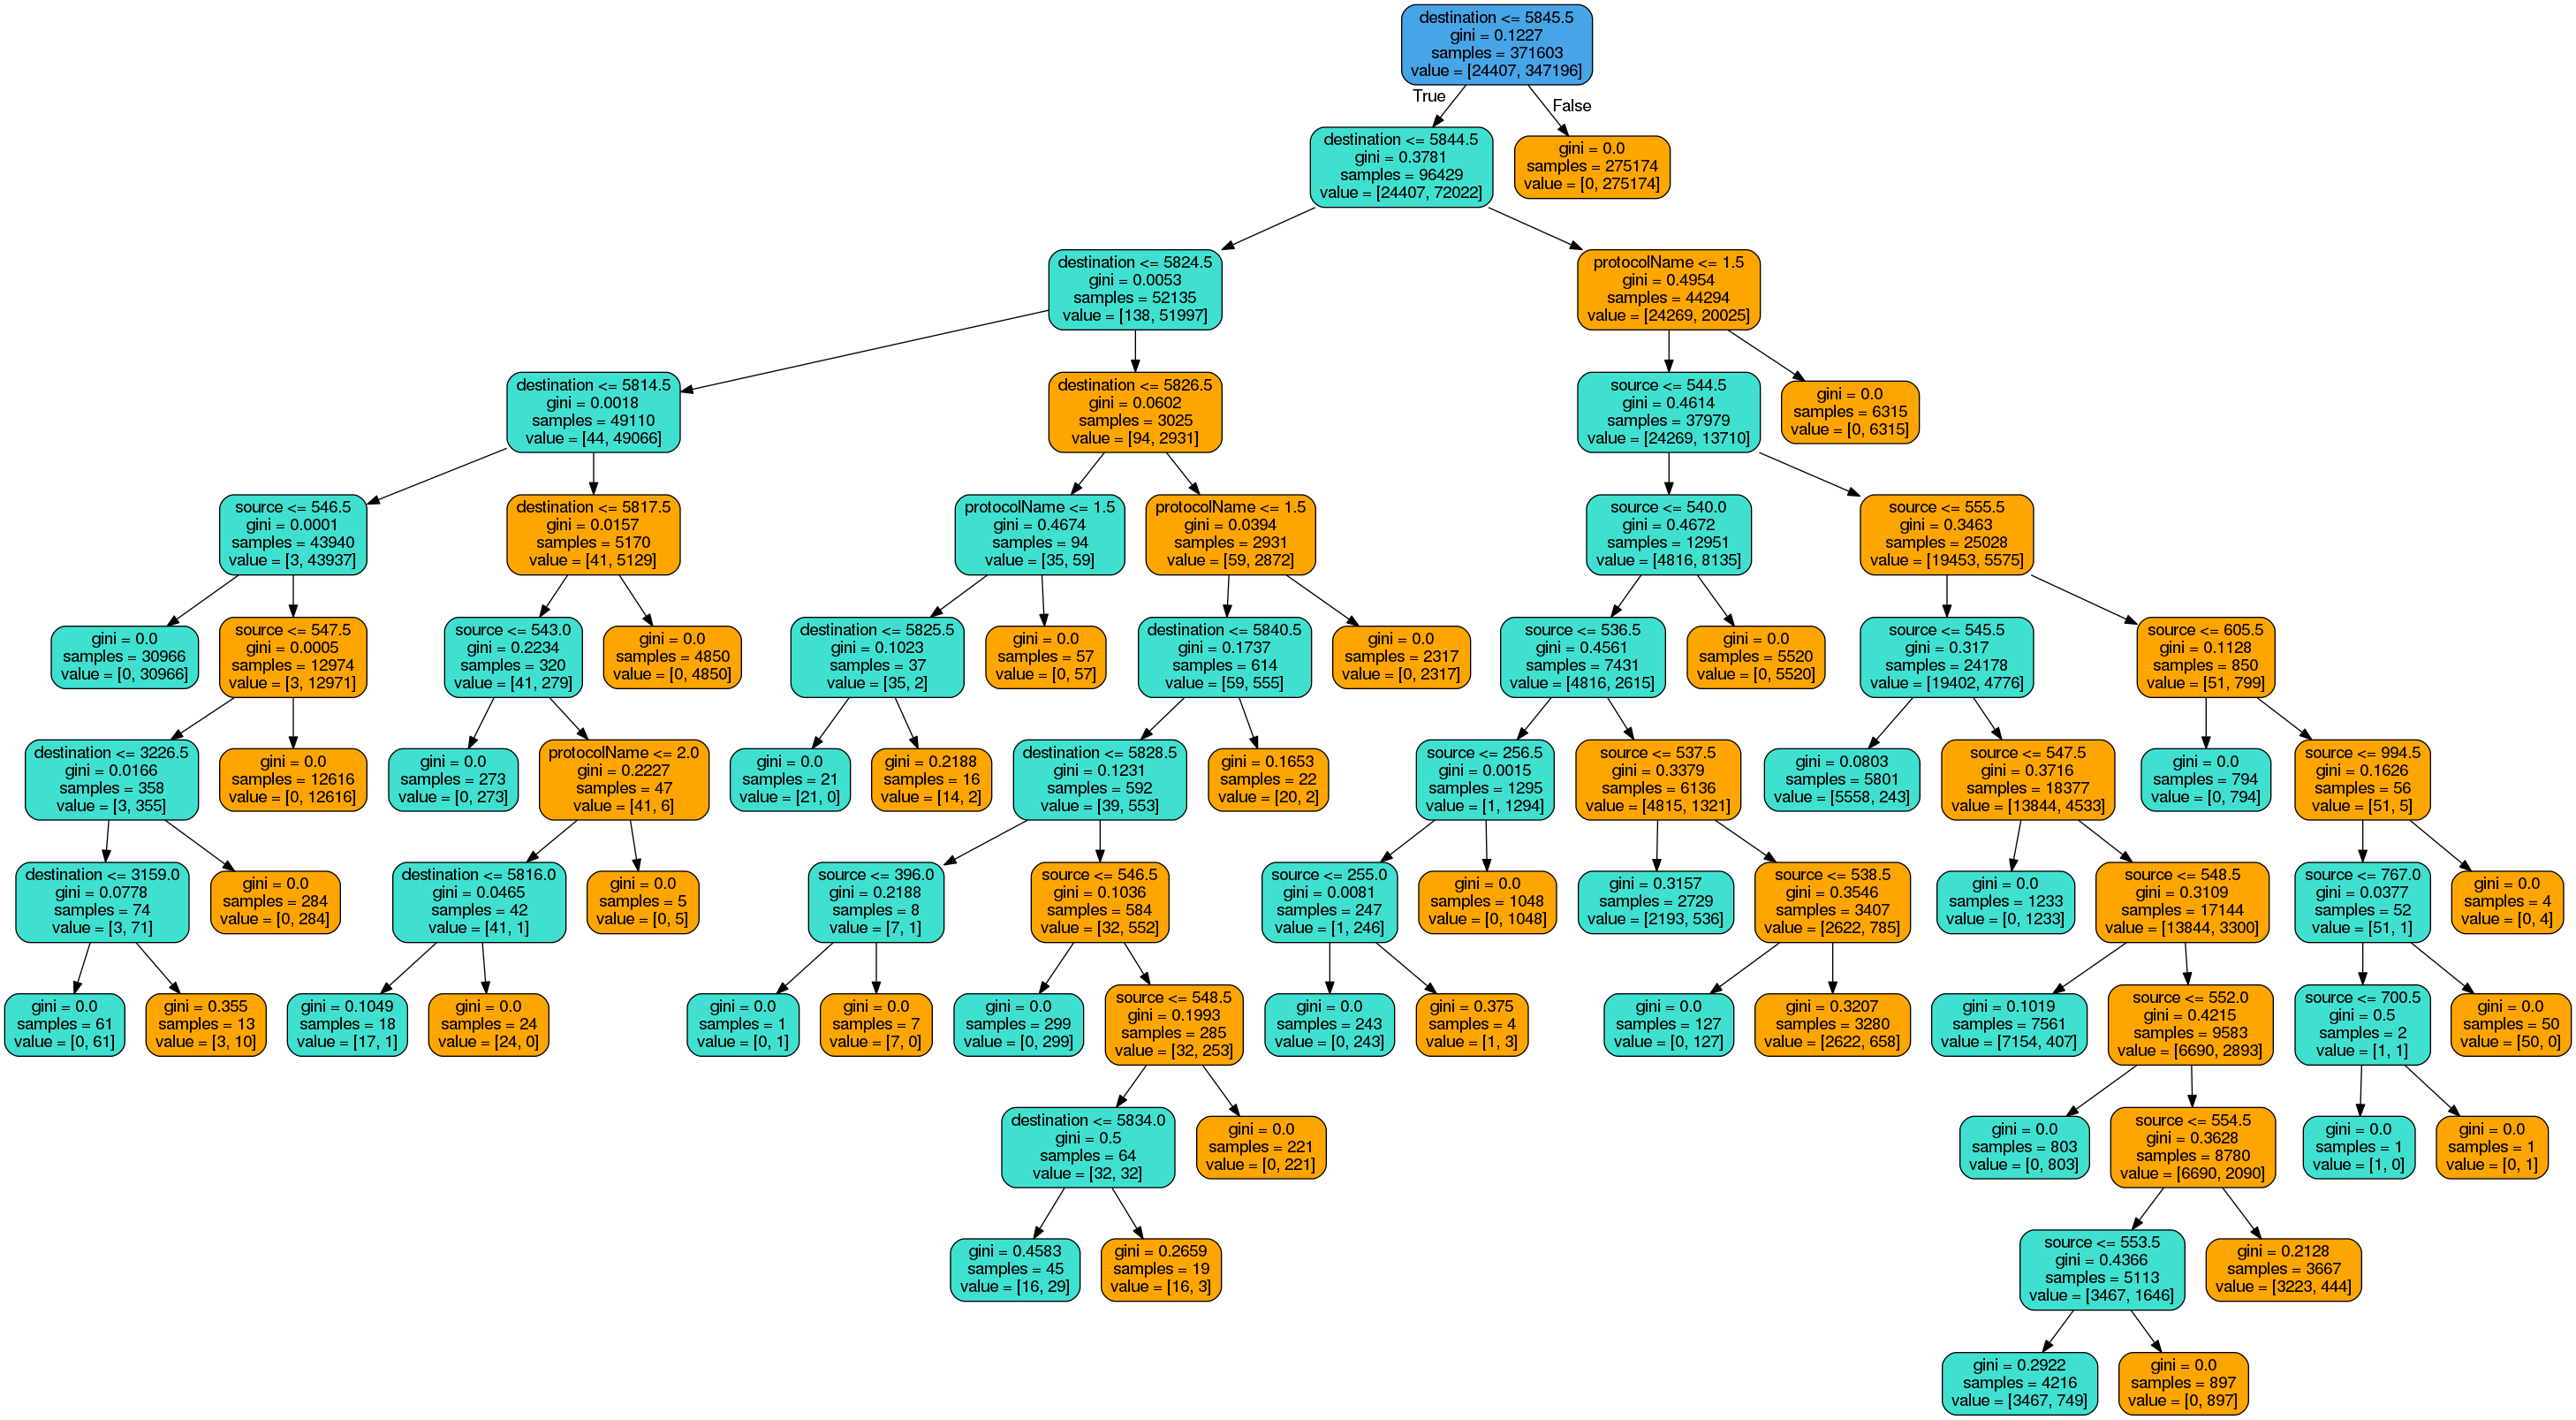

In [135]:
Image(graph.create_png())